<a href="https://colab.research.google.com/github/Mohamed-Harish-M-123/Capstone-Project-II/blob/main/TED_Talks_views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: TED Talks views prediction

**Project Type:** Machine Learning - Regression

**Name:** MOHAMED HARISH

**Contribution:** Individual

## Project Summary:
TED (Technology, Entertainment, Design) Talks are a series of influential and inspiring talks given by experts and thought leaders from a wide range of fields. The talks are typically 18 minutes or less and are designed to share innovative ideas, spark conversation, and foster learning.

TED Talks began in 1984 as a conference where experts from the fields of technology, entertainment, and design could come together to share their ideas. Since then, the TED conference has expanded to cover a wide range of topics, including science, business, education, and more.

The aim of this project is to develop a machine learning model that can predict the number of views a video uploaded to the TEDx website is likely to receive. The TEDx platform hosts a vast collection of informative and thought-provoking talks from a diverse range of speakers. The prediction model will help the organizers and the speakers to determine the impact of their talks and to optimize the success of future uploads.


## GitHub Link:

#### https://github.com/Mohamed-Harish-M-123/Capstone-Project-II

## Problem Statement:

  The problem statement for this project is to develop a regression model that can accurately predict the number of views that a TEDx talk video will receive on the website. To achieve this, we will need to collect a dataset of TEDx talk videos, along with their respective view counts, and use this data to train and test the regression model.

We will need to consider a variety of factors that may influence the view count of a video, such as the topic of the talk, the speaker's profile, the length of the video, and the language of the talk. We will use feature engineering techniques to extract relevant features from the data and use various regression algorithms to build the prediction model.

The success of the project will be evaluated based on the model's accuracy in predicting the view count of TEDx talk videos.

## Importing Libraries

In [63]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from sklearn import metrics


## Let's load our dataset

In [64]:
# mount our drive to colab

drive.mount('/content/drive')

path = '/content/drive/MyDrive/dataset/data_ted_talks.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


## Let's summarize our dataset
 

In [66]:
# Create a copy of the original data frame.

ted_talks_dataframe = df.copy()


In [67]:
# Check the shape

ted_talks_dataframe.shape

(4005, 19)

In [68]:
# Check the dataframe info

ted_talks_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [69]:
# Check for the null values

nullValues = ted_talks_dataframe.isnull().sum()

print(nullValues)

print("\nTotal Null values in this dataframe = ", nullValues.sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Total Null values in this dataframe =  1685


In [70]:
# Check for duplicate records or instances

print("Number of duplicate records in the dataset = ", ted_talks_dataframe.duplicated().sum())

Number of duplicate records in the dataset =  0


## Dataset information:


*   There are 4,005 records and 19 columns in our dataset.
*   5 columns contains null values and there are 1685 null values were present in our dataset.


*   No duplicate records.
*   Our target or dependent variable is 'views'.





## Let's proceed with Exploratory Data Analysis (EDA) - 

In [71]:
# Top ten most viewed videos in our dataset
mostViewedVideo = ted_talks_dataframe.nlargest(10, ['views'])
mostViewedVideo[['title', 'speaker_1', 'views']]

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


<Axes: title={'center': 'Top 10 most viewed videos'}, xlabel='speaker_1', ylabel='views'>

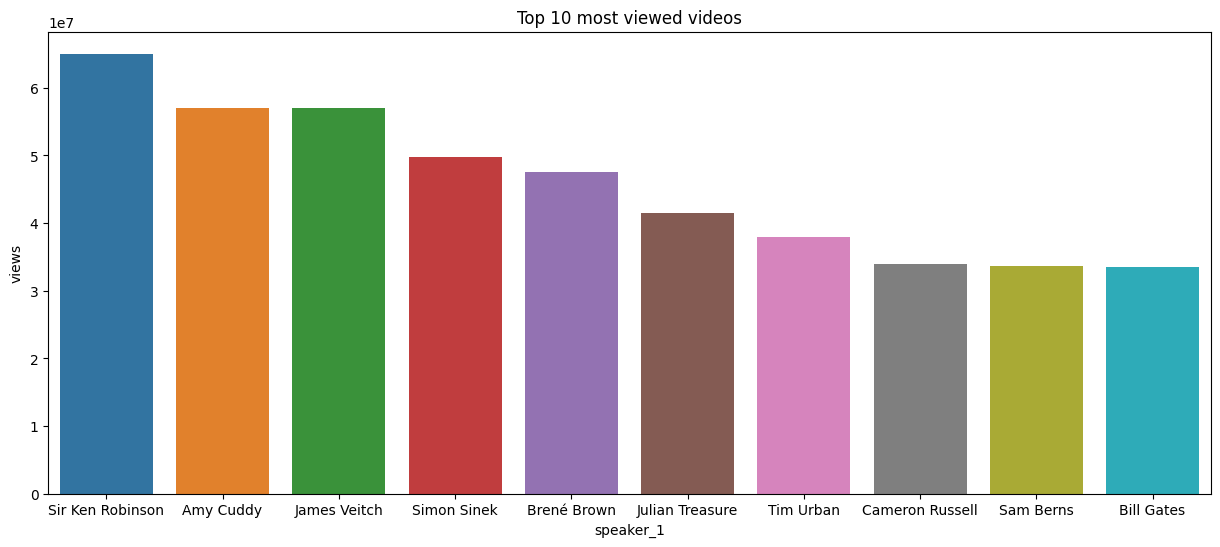

In [72]:
# Now let's visualize the above info

plt.figure(figsize = (15,6))
plt.title('Top 10 most viewed videos')
sns.barplot(data = mostViewedVideo, x = 'speaker_1', y = 'views')

In [73]:
# Now let's analyse the published date with respect to the views of the videos

print(ted_talks_dataframe['published_date'].dtype)

ted_talks_dataframe['published_date'] = pd.to_datetime(ted_talks_dataframe['published_date'])

ted_talks_dataframe['recorded_date'] = pd.to_datetime(ted_talks_dataframe['recorded_date'])

print(ted_talks_dataframe['recorded_date'].dtype)

object
datetime64[ns]


In [74]:
# Extract the day, month, year from the published_date column

ted_talks_dataframe['published_day'] = ted_talks_dataframe['published_date'].dt.day_name()

ted_talks_dataframe['published_month'] = ted_talks_dataframe['published_date'].dt.month_name()

ted_talks_dataframe['published_year'] = ted_talks_dataframe['published_date'].dt.year

ted_talks_dataframe.head(3)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Tuesday,June,2006


In [75]:
# Lets check which published month and day of the videos bagged more views in our dataset.

majority_published_month = ted_talks_dataframe[['published_month', 'talk_id']].groupby('published_month').agg({'talk_id' : 'count'})
majority_published_month = majority_published_month.sort_values(by= 'talk_id', ascending= False)
majority_published_month.reset_index(inplace=True)
majority_published_month

,published_month,talk_id
0,April,423
1,March,419
2,February,412
3,October,350
4,January,348
5,September,347
6,May,312
7,June,310
8,November,305
9,July,278


Text(0, 0.5, 'Number of video')

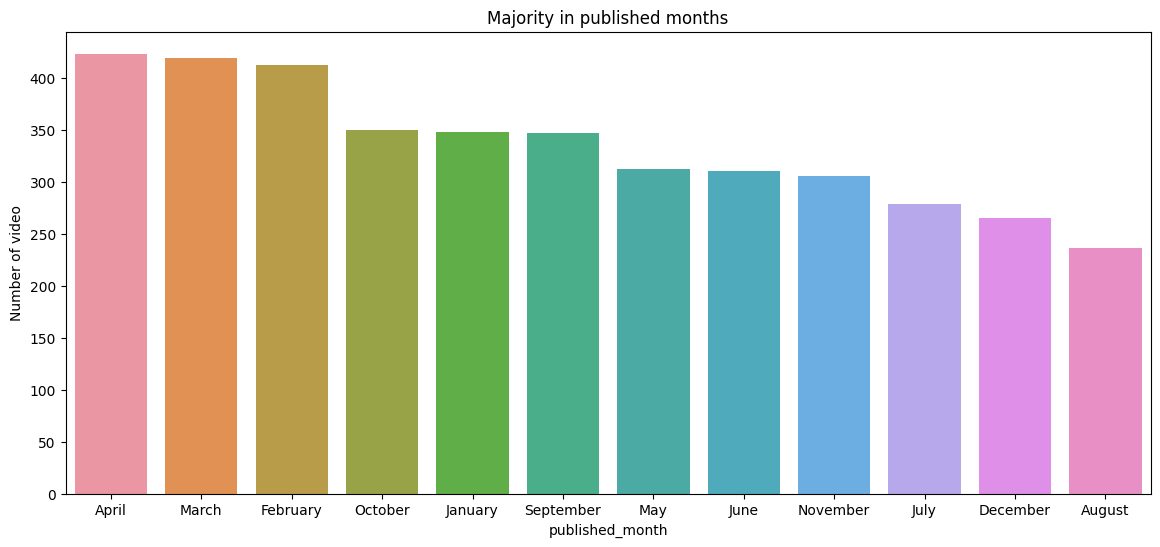

In [76]:
plt.figure(figsize=(14,6))

plt.title("Majority in published months")

sns.barplot(data = majority_published_month, x = 'published_month', y = 'talk_id')
plt.ylabel("Number of video")

Text(0, 0.5, 'Views')

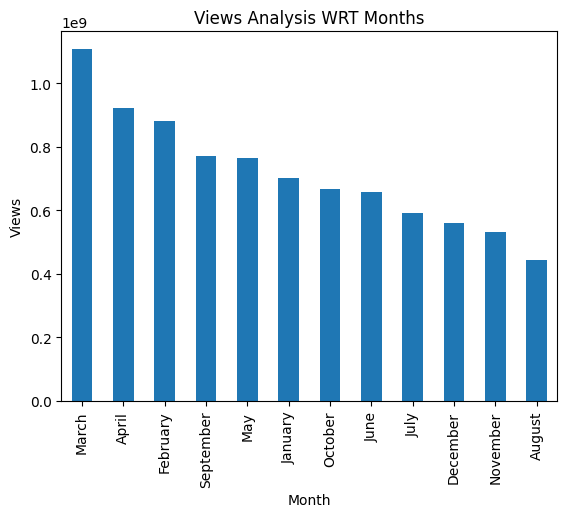

In [77]:
monthly_views = ted_talks_dataframe.groupby('published_month')['views'].sum()
monthly_views = monthly_views.sort_values(ascending=False)
monthly_views

monthly_views.plot(kind='bar')
plt.title("Views Analysis WRT Months")
plt.xlabel("Month")
plt.ylabel("Views")


### From the above **Month Analysis with respect to views**, below are our findings:
- Most of the videos were published in the month of **April followed by March and February.**
- And as we expected More number of views were recorded in the month of **March followed by April and February.**

### Now let's analyse the published year with respect to the recorded views of our dataset. Assuming, earlier the year, higher in views recorded.

Text(0, 0.5, 'Views')

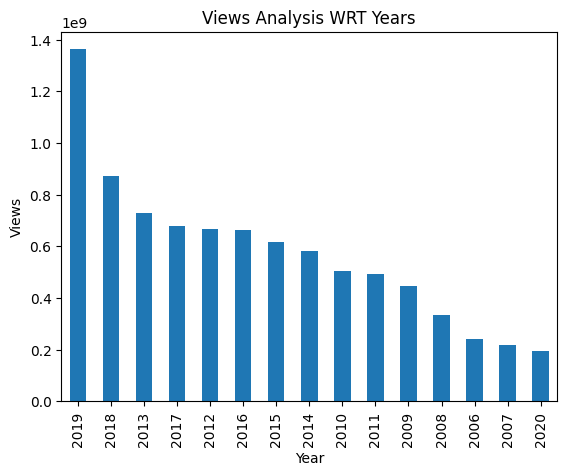

In [78]:
yearly_views = ted_talks_dataframe.groupby('published_year')['views'].sum()
yearly_views = yearly_views.sort_values(ascending=False)

yearly_views.plot(kind='bar')
plt.title("Views Analysis WRT Years")
plt.xlabel("Year")
plt.ylabel("Views")

### From the Above Year analysis with respect to views, below are our findings.
- To our surprise, more views are recorded with higher the year.
- It might be because of evolution of internet and its publicity.

## Let's check what day that the most of the videos published and further analysis

Text(0, 0.5, 'Views')

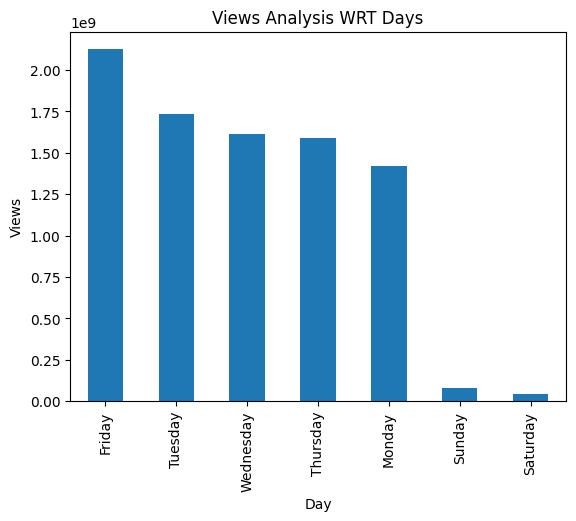

In [79]:
days_views = ted_talks_dataframe.groupby('published_day')['views'].sum()
days_views = days_views.sort_values(ascending=False)

days_views.plot(kind='bar')
plt.title('Views Analysis WRT Days')
plt.xlabel('Day')
plt.ylabel('Views')

In [80]:
majority_day = ted_talks_dataframe[['published_day', 'talk_id']].groupby('published_day').agg({'talk_id' : 'count'})
majority_day = majority_day.sort_values(by='talk_id', ascending=False)
majority_day

,talk_id
published_day,
Tuesday,857
Thursday,832
Friday,789
Monday,727
Wednesday,703
Sunday,55
Saturday,42


## From the above views analysis with respect to days, below are our findings,
- Most of the videos were published on Tuesday followed by Thursday and Friday.
- Videos released on Friday bagged more views followed by Tuesday and Wednesday.

## Now let's analyse the speaker_1 column of our dataset.

In [81]:
# Check the duplicates in the speaker_1 column

speaker1_duplicates = ted_talks_dataframe['speaker_1'].value_counts()
speaker1_duplicates = speaker1_duplicates[speaker1_duplicates > 1]
speaker1_duplicates

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
                    ..
Janine Benyus        2
Amory Lovins         2
Jane Goodall         2
Johann Hari          2
Frans Lanting        2
Name: speaker_1, Length: 424, dtype: int64

### From the analysis it's confirmed that,
- There are 424 speakers who delivered speeches on more than 1 topic.
- Highest number of videos recorded by a speaker is 34 followed by 19 and 12.
### Now let's check which speaker has bagged more views in total.

Text(0, 0.5, 'No. of views')

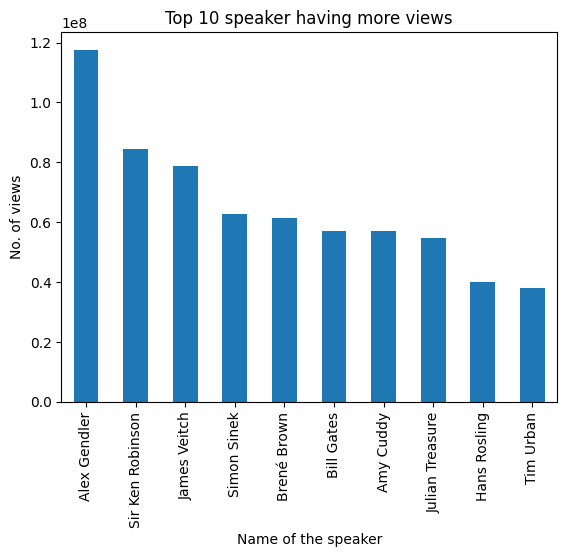

In [82]:
speaker1_views = ted_talks_dataframe.groupby('speaker_1')['views'].sum()
speaker1_most_views = speaker1_views.nlargest(10)
speaker1_most_views.plot(kind='bar')
plt.title("Top 10 speaker having more views")
plt.xlabel("Name of the speaker")
plt.ylabel("No. of views")


### **Alex Gendler** was on the top of the list followed by **Sir Ken Robinson and James Veitch.**

### Now let's analyse the 'event' column.

 Total count of each event occured 

 TED-Ed         556
TED2017         96
TED2018         96
TED2019         91
TED2014         84
              ... 
TEDxWanChai      1
TEDxUCDavis      1
TEDxUIdaho       1
TEDxVCU          1
TEDxUMKC         1
Name: event, Length: 459, dtype: int64


Text(0, 0.5, 'Views')

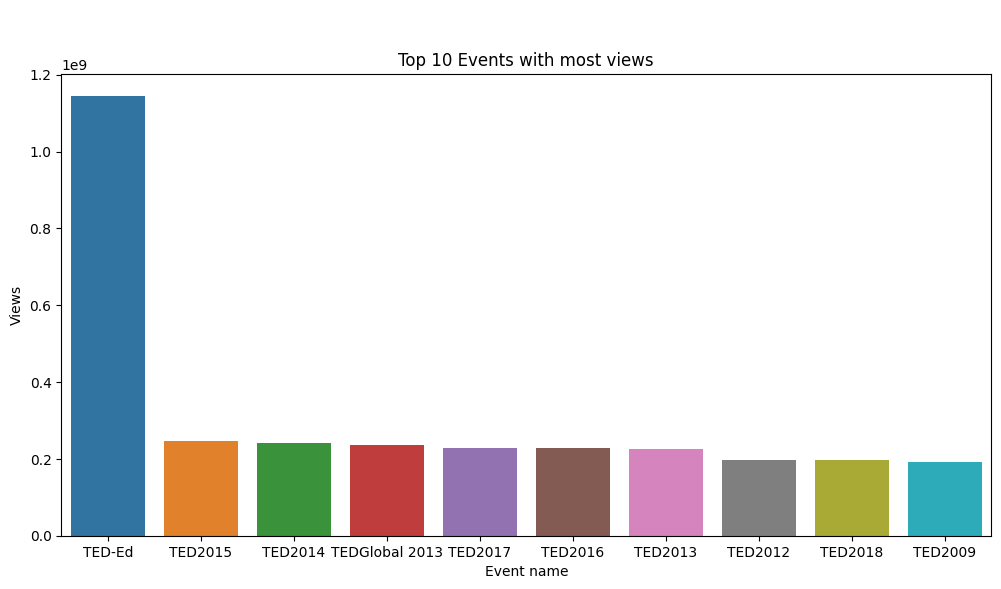

In [83]:
# Lets analyse the most occured event in our dataset.

count_event = ted_talks_dataframe['event'].value_counts().sort_values(ascending=False)
print(" Total count of each event occured \n\n", count_event)

# Now lets see the view count of the top 10 events

event_views = ted_talks_dataframe[['event', 'views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
event_views.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(x='event', y='views', data=event_views)
plt.title("\n\nTop 10 Events with most views")
plt.xlabel("Event name")
plt.ylabel("Views")

###From the above analysis, below are our findings.
- In total there were 459 unique events in our dataset.
- The event **'TED-ED' was the most occured event with count 556**. Followed by **'TED2017' and 'TED2018' of count 96** each.
- Also the event 'TED-ED' bagged the higgest views among the other events, followed by 'TED2015' and 'TED2014'

### Let's explore the Language columns ['native_lang', 'available_lang']

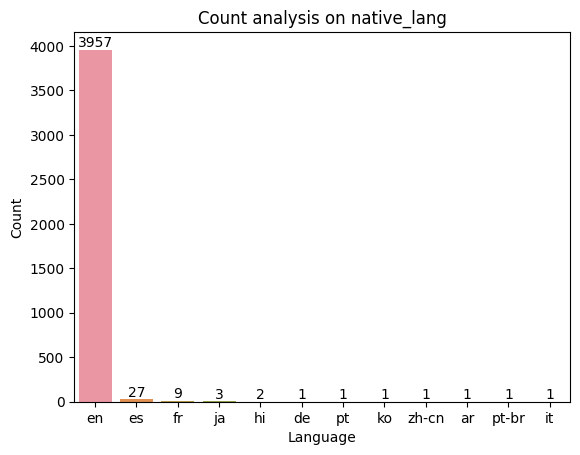

In [84]:
native_lang_counts = ted_talks_dataframe['native_lang'].value_counts()
order = native_lang_counts.sort_values(ascending=False).index
ax = sns.countplot(x='native_lang', data=ted_talks_dataframe, order=order)

# To plot the count of each language in its own bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Count analysis on native_lang")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

### Here the English language is dominating over the others, as it has **3957 entries.**

### Let's Analyse the **title and topic column** of our dataset.

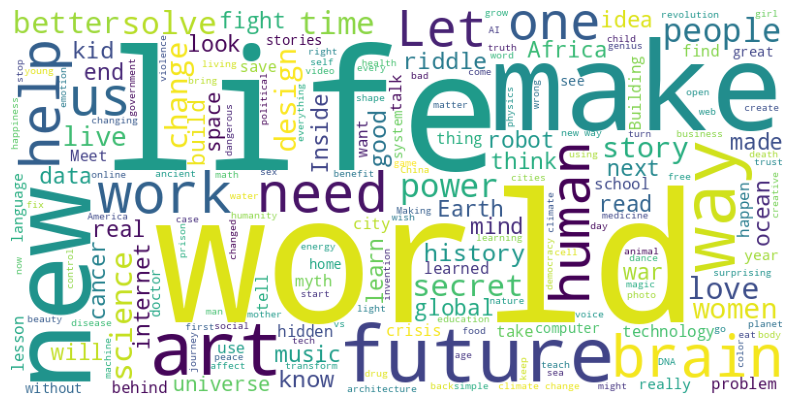

In [85]:
# Creating a word cloud to check the most frequent words used in title
from wordcloud import WordCloud

joined_title = " ".join(ted_talks_dataframe['title'])
title_cloud = WordCloud(width=800, height=400, background_color='white').generate(joined_title)

plt.figure(figsize=(10, 6))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

#

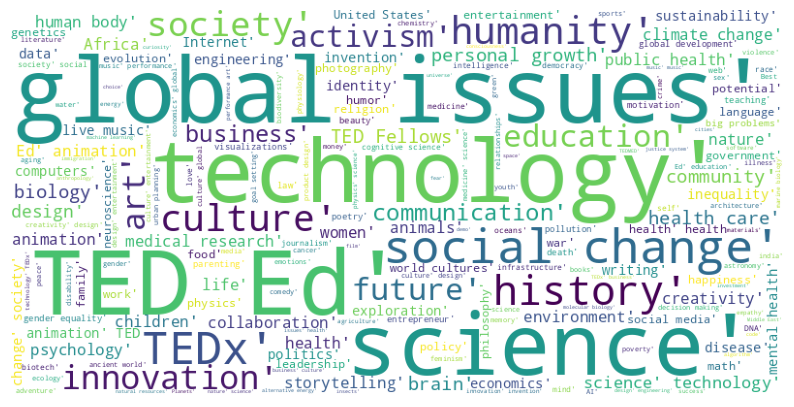

In [86]:
# Create a word cloud for the topic column

joined_topic = " ".join(topic for topic in ted_talks_dataframe.topics.astype(str))
topic_cloud = WordCloud(width=800, height=400, background_color='white').generate(joined_topic)

plt.figure(figsize=(10, 6))
plt.imshow(topic_cloud)
plt.axis('off')
plt.show()

#

Text(0.5, 1.0, 'Distribution of Views-Dependent variable')

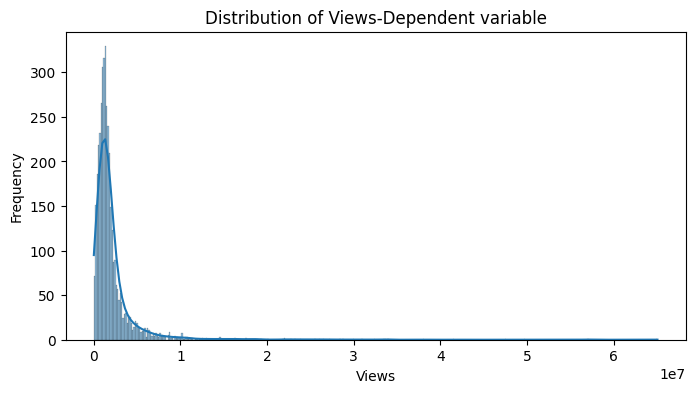

In [87]:
plt.figure(figsize=(8,4))
sns.histplot(ted_talks_dataframe['views'], kde=True)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views-Dependent variable')

Text(0.5, 1.0, 'Distribution of Comments')

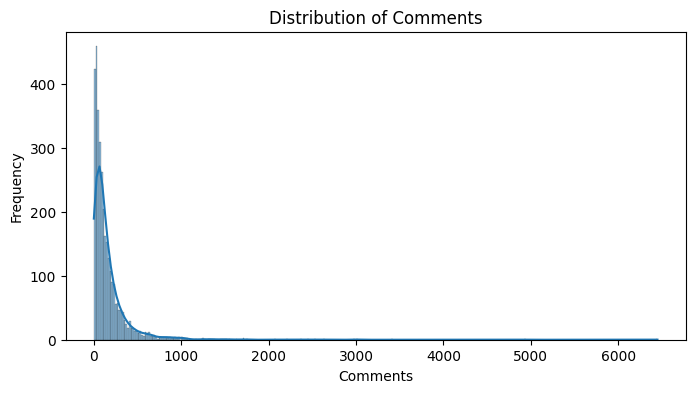

In [88]:
plt.figure(figsize=(8,4))
sns.histplot(ted_talks_dataframe['comments'], kde=True)
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments')

Text(0.5, 1.0, 'Distribution of Video duration')

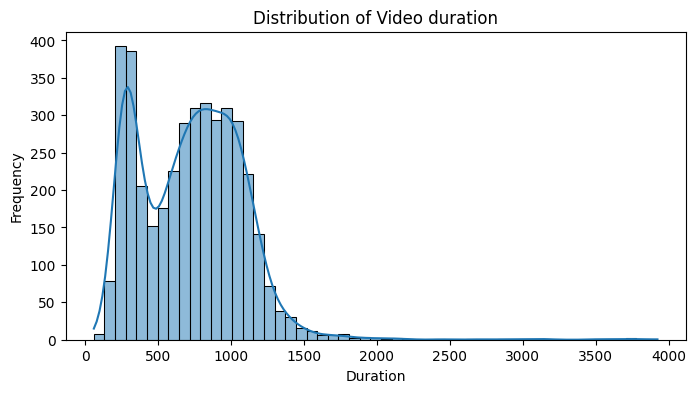

In [89]:
plt.figure(figsize=(8,4))
sns.histplot(ted_talks_dataframe['duration'], kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Video duration')

## Data Cleaning and Outlier Detection and Treatment


In [90]:
# Replacing the null values from the column 'all_speakers'

ted_talks_dataframe["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)
print("Null values in all_speaker column = ", ted_talks_dataframe['all_speakers'].isnull().sum())

Null values in all_speaker column =  0


In [91]:
# Replacing the null values from the column 'occupations'

ted_talks_dataframe['occupations'].fillna(value = str({0:'others'}), axis = 0, inplace=True)
print("Null values in occupation column = ", ted_talks_dataframe['occupations'].isnull().sum())

Null values in occupation column =  0


In [92]:
# Replacing the null values from the column 'about_speaker'

ted_talks_dataframe['about_speakers'].fillna(value = 'Not mentioned', axis = 0, inplace=True)
print("Null values in about_speaker column = ", ted_talks_dataframe['about_speakers'].isnull().sum())

Null values in about_speaker column =  0


In [93]:
# Replacing the null values from the column 'recorded_date'

ted_talks_dataframe['recorded_date'].fillna(value = 'Not mentioned', axis = 0, inplace=True)
print("Null values in recorded_date column = ", ted_talks_dataframe['recorded_date'].isnull().sum())

Null values in recorded_date column =  0


In [94]:
# It is evident that the distribution of comments values is right skewed.
# Replacing the null values of the column 'comments' with the median value to maintain the distribution of the data. 

comments_median = int(ted_talks_dataframe['comments'].median())
ted_talks_dataframe['comments'].fillna(comments_median, inplace=True)

print("\nTotal null values of the dataset = ", ted_talks_dataframe.isnull().sum().sum())


Total null values of the dataset =  0


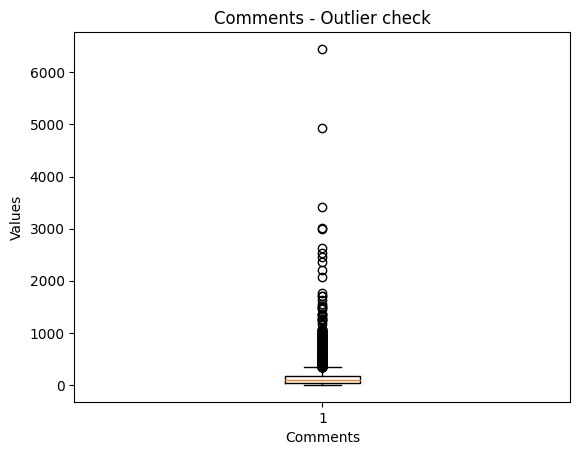

In [95]:
# Lets check the outliers of the 'comments' column

plt.boxplot(ted_talks_dataframe['comments'])
plt.title('Comments - Outlier check')
plt.xlabel('Comments')
plt.ylabel('Values')
plt.show()

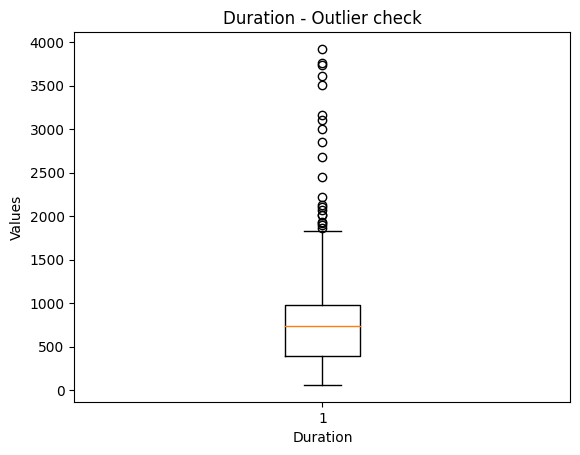

In [96]:
plt.boxplot(ted_talks_dataframe['duration'])
plt.title('Duration - Outlier check')
plt.xlabel('Duration')
plt.ylabel('Values')
plt.show()

### The above outliers occured in the comments and duration features were natural outliers, hence we can leave them in our dataset.

## Feature Engineering
#### The overall objective of feature engineering is to enhance the performance, accuracy, and interpretability of machine learning models by transforming and selecting the most relevant and informative features from the raw data.

In [97]:
# Here we'll add a new feature with the count of the available language

ted_talks_dataframe["available_lang_count"] = ted_talks_dataframe["available_lang"].apply(lambda x: len(eval(x)))


In [41]:
# Lets add an another feature carrying the count of the topics covered

ted_talks_dataframe["topics_covered"] = ted_talks_dataframe["topics"].apply(lambda x: len(eval(x)))

####Let's perform **One-hot encoding and Target encoding** to our categorical features of our dataset.

In [99]:
# Encode the 'published_day' and 'published_month' cloumns using one-hot encoder

encode_columns = ['published_day', 'published_month']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(ted_talks_dataframe[encode_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encode_columns))
model_df = pd.concat([ted_talks_dataframe, encoded_df], axis=1)
model_df.head(1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month_December,published_month_February,published_month_January,published_month_July,published_month_June,published_month_March,published_month_May,published_month_November,published_month_October,published_month_September
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25 00:00:00,2006-06-27,TED2006,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [100]:
## Perform Target encoding for event column
encode_event=model_df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
encode_event=encode_event.to_dict()
encode_event=encode_event.values()
encode_event=  list(encode_event)[0]
model_df['avg_views_for_event']=model_df['event'].map(encode_event)
model_df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month_February,published_month_January,published_month_July,published_month_June,published_month_March,published_month_May,published_month_November,published_month_October,published_month_September,avg_views_for_event
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25 00:00:00,2006-06-27,TED2006,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.876291e+06


In [101]:
model_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_day',
       'published_month', 'published_year', 'available_lang_count',
       'published_day_Friday', 'published_day_Monday',
       'published_day_Saturday', 'published_day_Sunday',
       'published_day_Thursday', 'published_day_Tuesday',
       'published_day_Wednesday', 'published_month_April',
       'published_month_August', 'published_month_December',
       'published_month_February', 'published_month_January',
       'published_month_July', 'published_month_June', 'published_month_March',
       'published_month_May', 'published_month_November',
       'published_month_October', 'published_month_September',
       'avg_views_for_event'],
      dtype='object')

In [102]:
# Lets drop the columns which were not useful to fit in the models.

model_df.drop(labels = ["talk_id", "title", "speaker_1", "all_speakers", "occupations",
                                   "about_speakers", "recorded_date", "published_date", "event", "native_lang",
                                   "available_lang", "topics", "related_talks", "url", "description",
                                   "transcript", "published_day", "published_month"], axis = 1, inplace = True)

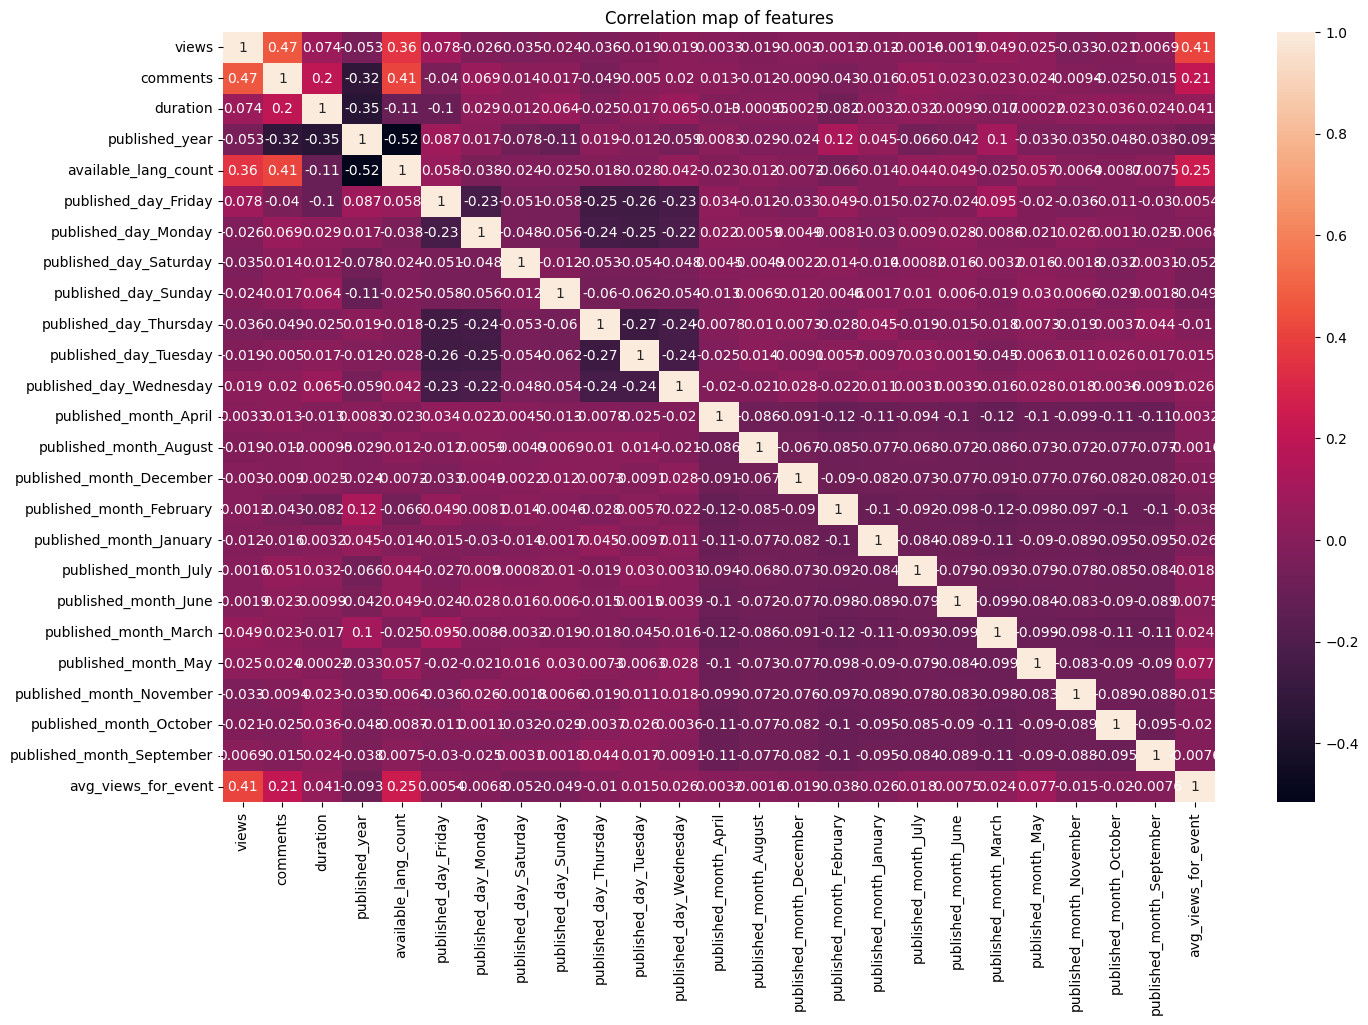

In [104]:
# Lets visualize the correlation between the features of our dataframe

correlation_matrix = model_df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation map of features")
plt.show()

## Data Splitting
#### The objective of data splitting in a machine learning project is to evaluate the performance and generalization ability of a trained model on unseen data.
#### **Training Set:** The training set is used to train the machine learning model. The objective is to expose the model to a significant amount of labeled data, allowing it to learn patterns and relationships within the data.
####**Test Set:** The test set is used to evaluate the performance of the trained model. It represents unseen data that the model has not been exposed to during the training and validation phases.

In [107]:
# independent variables
X = model_df[list(model_df.columns)[1:]]

# dependent variable - Target variable
y = model_df["views"]

In [108]:
# Split the dataset into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
# Check the shape of the X (independent) dataset
print(X_train.shape)
print(X_test.shape) 

(3204, 24)
(801, 24)


## Feature Scaling
#### Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [110]:
# Apply feature scaling to our training and test datasets- Independent variable

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training
### Let's train different regressor models by fitting our processed dataset to it.
### **1. Linear Regressor Model:**
####Linear regression is a widely used statistical modeling technique for predicting a continuous outcome variable based on one or more input features. It assumes a linear relationship between the input variables and the target variable. In a linear regression model, the goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual values of the target variable. 

In [111]:
# Fitting the training dataset to the model.

reg = LinearRegression().fit(X_train, y_train)

In [112]:
# Predicting the dependent values for training and test set

y_test_pred = reg.predict(X_test)

# Calculating the MSE and RMSE of our model

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE is" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE is" ,RMSE)

# Calculating the MAE of our model

print('MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

# calculating r2 and adjusted r2
r2_lr= r2_score(y_test, y_test_pred)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE is 13509757953557.22
RMSE is 3675562.2635941324
MAE: 1454465.96
R2 : 0.3358152440595833
Adjusted R2 : 0.3152734474841066


### **2. Decision Tree:**
####Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

####Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In [113]:
# Create a Decision Tree Regressor object
decision_reg = DecisionTreeRegressor()

# Fit the model to the training data
decision_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_reg.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
RMSE_dt = np.sqrt(mse_dt)
MAE_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
Adjusted_R2_dt = (1-(1-r2_score(y_test, y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Mean Squared Error:", mse_dt)
print("RMSE: ", RMSE_dt)
print("MAE: ", MAE_dt)
print("R2:", r2_dt)
print("Adjusted R2: ", Adjusted_R2_dt)

Mean Squared Error: 15905894684589.508
RMSE:  3988219.4880158626
MAE:  1508911.2846441946
R2: 0.21801317126363806
Adjusted R2:  0.19382801161199814


###**3. Random Forest:**
####Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

####As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

####Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [114]:
# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor()

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
RMSE_rf = np.sqrt(mse_rf)
MAE_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
Adjusted_R2_rf = (1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Mean Squared Error:", mse_dt)
print("RMSE: ", RMSE_dt)
print("MAE: ", MAE_dt)
print("R2:", r2_dt)
print("Adjusted R2: ", Adjusted_R2_dt)



Mean Squared Error: 15905894684589.508
RMSE:  3988219.4880158626
MAE:  1508911.2846441946
R2: 0.21801317126363806
Adjusted R2:  0.19382801161199814


In [ ]:
#Random Forest Regressor - Hyperparameter tuning
# Number of trees
n_estimators = [30,50,80,100,120,150]
# Maximum depth of trees
max_depth = [4,6,8,10,12]
# Minimum number of samples required to split a node
min_samples_split = [50,80,100,150,200,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
#RandomSearch
rf_random = RandomizedSearchCV(rf_reg,param_dict,verbose=2,cv=5)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=4,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200, 20],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]},
                   verbose=2)

In [ ]:
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [ ]:
y_test_pred_rf = rf_optimal_model.predict(X_test)
print('MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred_rf)))
print('r_sqr value for train:', r2_score(y_test, y_test_pred_rf))

MAE: 1279531.45
r_sqr value for train: 0.296312326527271


In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)

r_squared= r2_score(y_test,y_hat)